In [1]:
import face_recognition
from matplotlib import pyplot as plt
import glob
import pickle

In [ ]:
# image = face_recognition.load_image_file("2.jpg")
# image2 = face_recognition.load_image_file("1.bmp")

In [ ]:
def get_embedding_faces_in_dir (path):
    paths = glob.glob( path +'*.jpg')
    N = len(paths)
    i = 1
    path_and_embedding = []
    for path_img in paths:
        print (str(i) +' / ' + str(N))
        image = face_recognition.load_image_file(path_img)
        embeddings = face_recognition.face_encodings(image)
        for embedding in embeddings:
            path_and_embedding.append ([path_img, embedding])
        i = i + 1
    return path_and_embedding

In [ ]:
path_and_embedding = get_embedding_faces_in_dir ('./input/')


with open('embedings.pickle', 'wb') as f:
    pickle.dump(path_and_embedding, f)


In [ ]:
def get_path_to_image (path_and_embedding, unknown_img_face):
    image_unknown = face_recognition.load_image_file(unknown_img_face)
    unknown_encoding = face_recognition.face_encodings(image_unknown)
    path_list=[]
    for biden_embeding in path_and_embedding:
        results = face_recognition.compare_faces(biden_embeding[1], unknown_encoding)
        if results[0] :
            path_list.append(biden_embeding[0])
    return path_list

In [ ]:
images_path_list = get_path_to_image (path_and_embedding,'будников.jpg' )


In [ ]:
image_input = face_recognition.load_image_file("будников.jpg")
plt.imshow(image_input)
plt.title ('input_image')
plt.show()

In [ ]:
images_path_list

In [ ]:
def show_image (images_path_list):
    for image_path in images_path_list:
        image = face_recognition.load_image_file(image_path)
        plt.imshow(image)
        plt.title (image_path.split('/')[2])
        plt.show()

In [ ]:
show_image (images_path_list)

In [ ]:
import pickle
with open('embedings.pickle', 'wb') as f:
    pickle.dump(path_and_embedding, f)
with open('embedings.pickle', 'rb') as f:
    path_and_embedding_r = pickle.load(f)


In [2]:
#(150, 1182, 305, 1027)
#y:y+h, x:x+w
# 0 2 3 1 
def get_faces (image):
    face_locs = face_recognition.face_locations(image)
    print ()
    face_list = []
    for face_loc in face_locs:  
        print (face_loc)
        face_list.append( image[face_loc[0]:face_loc[2],face_loc[3]:face_loc[1]] )
    return face_list

In [48]:
image = face_recognition.load_image_file("1.jpg")

In [84]:
face_locs = face_recognition.face_locations(image)
print ()
face_list = []
for face_loc in face_locs:  
    print (face_loc)
    face_list.append( image[face_loc[0]:face_loc[2],face_loc[3]:face_loc[1]] )


(1790, 2739, 1976, 2553)
(1357, 2079, 1543, 1893)
(976, 3435, 1130, 3280)
(1784, 3744, 1939, 3589)
(1337, 1663, 1492, 1508)
(1071, 2303, 1200, 2174)
(1371, 2936, 1526, 2781)
(1873, 716, 2059, 531)
(941, 1182, 1096, 1027)
(1400, 2489, 1529, 2360)
(1852, 1625, 2038, 1439)
(1811, 1171, 1997, 985)
(655, 1715, 784, 1586)
(1056, 2676, 1185, 2547)
(993, 2987, 1148, 2833)
(1852, 2223, 2038, 2037)
(1790, 3255, 1976, 3069)
(718, 3933, 872, 3779)
(546, 1440, 700, 1285)
(855, 2506, 1010, 2351)
(1062, 2024, 1216, 1869)
(1357, 4370, 1543, 4184)
(669, 3349, 798, 3220)
(923, 634, 1109, 448)


In [7]:
len (face_list)

24

(1790, 2739, 1976, 2553)
(1357, 2079, 1543, 1893)
(976, 3435, 1130, 3280)
(1784, 3744, 1939, 3589)
(1337, 1663, 1492, 1508)
(1071, 2303, 1200, 2174)
(1371, 2936, 1526, 2781)
(1873, 716, 2059, 531)
(941, 1182, 1096, 1027)
(1400, 2489, 1529, 2360)
(1852, 1625, 2038, 1439)
(1811, 1171, 1997, 985)
(655, 1715, 784, 1586)
(1056, 2676, 1185, 2547)
(993, 2987, 1148, 2833)
(1852, 2223, 2038, 2037)
(1790, 3255, 1976, 3069)
(718, 3933, 872, 3779)
(546, 1440, 700, 1285)
(855, 2506, 1010, 2351)
(1062, 2024, 1216, 1869)
(1357, 4370, 1543, 4184)
(669, 3349, 798, 3220)
(923, 634, 1109, 448)


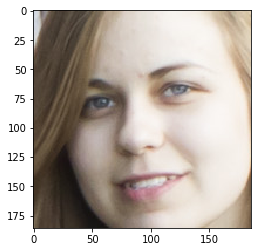

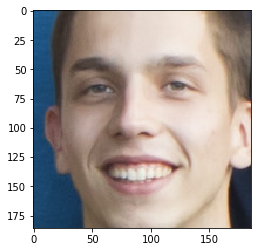

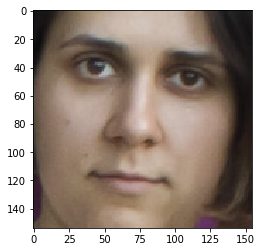

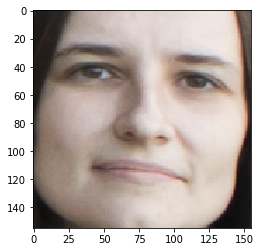

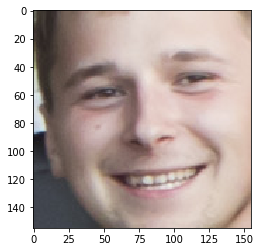

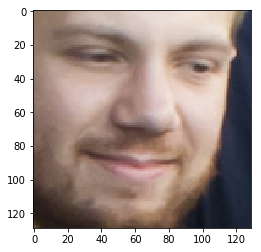

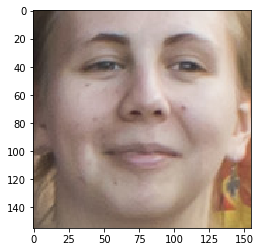

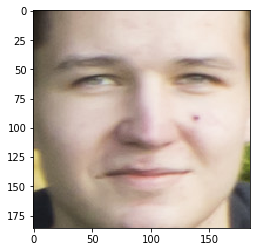

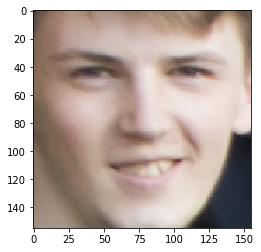

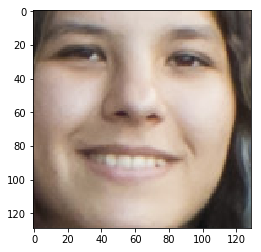

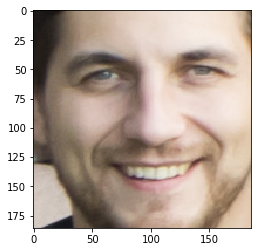

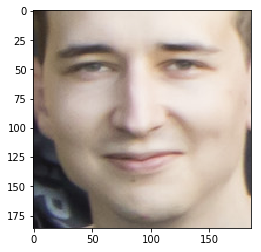

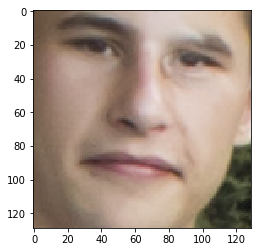

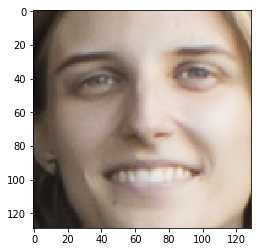

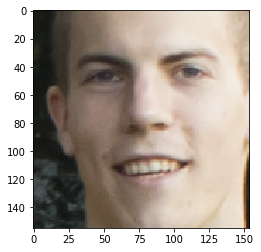

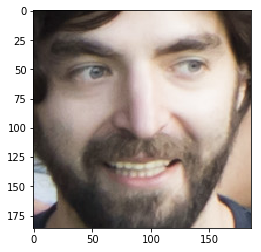

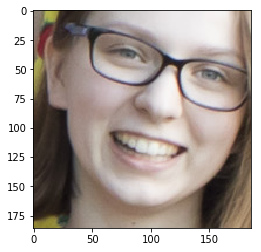

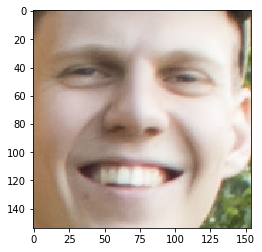

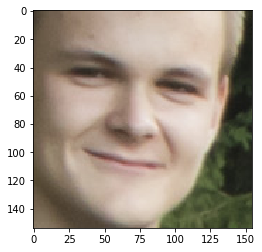

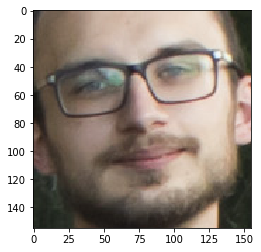

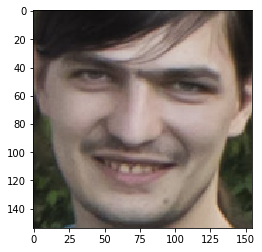

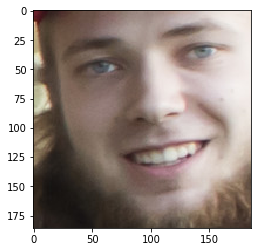

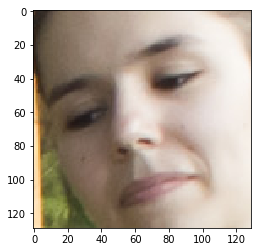

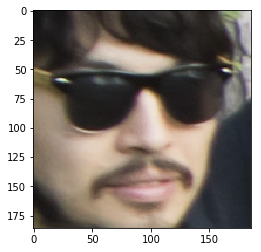

In [4]:
%matplotlib inline
faces = get_faces(image)
for face in faces:
    plt.imshow(face)
    plt.show()

In [14]:
import cv2 as cv
i = 0
for face in faces:
    i = i + 1
    cv.imwrite( './output2/'+ str(i) + '.jpg' , cv.cvtColor(face, cv.COLOR_RGB2BGR) )

In [27]:
i

(1790, 2739, 1976, 2553)

In [28]:
# (1790, 2739, 1976, 2553)
# print (face_locs)
import numpy
j=0
for i in face_locs:
    j = j + 1
#     triangle = numpy.array([ [i[2],i[3]], [i[2],i[1]],[i[0],i[1]],[i[0],i[3]] ], numpy.int32)
    print
    cv.fillPoly (image , i ,255)
    cv.imwrite( './output2/__'+ str(i) + '.jpg' , cv.cvtColor(image, cv.COLOR_RGB2BGR) )

#cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

#cv2.fillPoly (img,(x,y),(x+w,y+h),(255))
#image[face_loc[0]:face_loc[2],face_loc[3]:face_loc[1]]
#y:y+h, x:x+w
# 0 2 3 1 

error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2407: error: (-215:Assertion failed) p.checkVector(2, 4) >= 0 in function 'fillPoly'


In [86]:
image = face_recognition.load_image_file("1.jpg")
i = 0
for (top, right, bottom, left) in face_locs:
    i = i+1
    cv.rectangle(image,(right+50,top-50),(left-50,bottom+50),(0,0,0),-1)
    cv.imwrite( './output2/__'+ str(i) + '.jpg' , cv.cvtColor(image, cv.COLOR_RGB2BGR) )

In [85]:
face_locs

[(1790, 2739, 1976, 2553),
 (1357, 2079, 1543, 1893),
 (976, 3435, 1130, 3280),
 (1784, 3744, 1939, 3589),
 (1337, 1663, 1492, 1508),
 (1071, 2303, 1200, 2174),
 (1371, 2936, 1526, 2781),
 (1873, 716, 2059, 531),
 (941, 1182, 1096, 1027),
 (1400, 2489, 1529, 2360),
 (1852, 1625, 2038, 1439),
 (1811, 1171, 1997, 985),
 (655, 1715, 784, 1586),
 (1056, 2676, 1185, 2547),
 (993, 2987, 1148, 2833),
 (1852, 2223, 2038, 2037),
 (1790, 3255, 1976, 3069),
 (718, 3933, 872, 3779),
 (546, 1440, 700, 1285),
 (855, 2506, 1010, 2351),
 (1062, 2024, 1216, 1869),
 (1357, 4370, 1543, 4184),
 (669, 3349, 798, 3220),
 (923, 634, 1109, 448)]

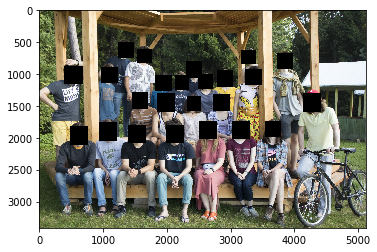

In [87]:
plt.imshow(image)
plt.show()


In [51]:
# cv.imwrite( './output2/__'+ str(i) + '.jpg' , cv.cvtColor(image, cv.COLOR_RGB2BGR) )

True